In [2]:
import tensorflow as tf
import tensorflowvisu
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
import tensorflow.examples.tutorials.mnist.input_data as input_data
import os
tf.set_random_seed(202109)

# The model is:
#
# Y = softmax( X * W + b)
#              X: matrix for 100 grayscale images of 28x28 pixels, flattened (there are 100 images in a mini-batch)
#              W: weight matrix with 784 lines and 10 columns
#              b: bias vector with 10 dimensions
#              +: add with broadcasting: adds the vector to each line of the matrix (numpy)
#              softmax(matrix) applies softmax on each line
#              softmax(line) applies an exp to each value then divides by the norm of the resulting line
#              Y: output matrix with 100 lines and 10 columns

# Download images 
#mnist = read_data_sets("data", one_hot=True, reshape=False, validation_size=0)
# if you have downloaded, just read data 
mnist = input_data.read_data_sets(os.getcwd() + "../MNIST_data/", one_hot=True, reshape=False, validation_size=0)

Extracting /Users/liaoyuyu/Documents/DeepLearning/TensorFlow/LearnTensorFlowAndDeepLearningWithoutPHD../MNIST_data/train-images-idx3-ubyte.gz
Extracting /Users/liaoyuyu/Documents/DeepLearning/TensorFlow/LearnTensorFlowAndDeepLearningWithoutPHD../MNIST_data/train-labels-idx1-ubyte.gz
Extracting /Users/liaoyuyu/Documents/DeepLearning/TensorFlow/LearnTensorFlowAndDeepLearningWithoutPHD../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /Users/liaoyuyu/Documents/DeepLearning/TensorFlow/LearnTensorFlowAndDeepLearningWithoutPHD../MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# input X: 28x28 grayscal images
# 1-dimension: the number of data, 2 & 3-dimension: the number of image height and weight, 
# 4-dimension: the number of image's color, 1 is grayscal, 3 is RGB
X = tf.placeholder(tf.float32, [None, 28, 28, 1])

# output
Y_ = tf.placeholder(tf.float32, [None, 10])

# weights 
W = tf.Variable(tf.zeros([784, 10]))

# bias
b = tf.Variable(tf.zeros([10]))

# flatten the images 
# -1 in the shape definition means the only possible dimension that will preserve the number of elements
XX = tf.reshape(X, [-1, 784])

# Building Model
Y = tf.nn.softmax(tf.matmul(XX, W) + b)

# loss function: cross-entropy = - sum( Y_i * log(Yi) )
#                           Yi: the computed output vector
#                           Y_i: the desired output vector
# log takes the log of each element, * multiplies the tensors element by element
# reduce_mean will add all the components in the tensor
# so here we end up with the total cross-entropy for all images in the batch
cross_entropy = -tf.reduce_sum(Y_ * tf.log(Y))

# accuracy of the train model
# tf.cast: convert the data type
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# optimizer 
learning_rate = 0.003
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_step = optimizer.minimize(cross_entropy)

In [6]:
# initial 
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

epoch_set = []
accuracy_set = []
loss_set = []
batch_size = 100
training_epochs = 25
display_step = 1
for epoch in range(training_epochs):
    avg_accuracy = 0
    avg_loss = 0
    total_batch = int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        # load batch of images 
        batch_X, batch_Y = mnist.train.next_batch(batch_size)
        train_data = {X:batch_X, Y_:batch_Y}
    
        # train
        sess.run(train_step, feed_dict=train_data)
    
        # accuracy
        train_acc, train_corr = sess.run([accuracy, cross_entropy], feed_dict=train_data)
        avg_accuracy += train_acc/total_batch
        avg_loss += train_corr/total_batch
        
    epoch_set.append(epoch + 1)
    accuracy_set.append(avg_accuracy)
    loss_set.append(avg_loss)
    if epoch % display_step ==0:
        print("epoch:" + str(epoch + 1) + ", loss:" + str(round(avg_loss, 6)) +
              ", train_accuracy:" + str(round(avg_accuracy, 6)))
    # test
    #test_data = {X:mnist.test.images, Y_:mnist.test.labels}
    #acc, corr = sess.run([accuracy, cross_entropy], feed=test_data)

epoch:1, loss:36.977073, train_accuracy:0.9068
epoch:2, loss:28.035979, train_accuracy:0.92395
epoch:3, loss:26.549807, train_accuracy:0.928017
epoch:4, loss:25.742294, train_accuracy:0.929933
epoch:5, loss:25.177904, train_accuracy:0.931867
epoch:6, loss:24.795924, train_accuracy:0.933567
epoch:7, loss:24.529873, train_accuracy:0.934017
epoch:8, loss:24.211202, train_accuracy:0.93445
epoch:9, loss:24.048047, train_accuracy:0.935567
epoch:10, loss:23.812906, train_accuracy:0.935583
epoch:11, loss:23.754646, train_accuracy:0.935283
epoch:12, loss:23.604938, train_accuracy:0.936283
epoch:13, loss:23.489039, train_accuracy:0.937367
epoch:14, loss:23.35626, train_accuracy:0.937433
epoch:15, loss:23.25548, train_accuracy:0.936933
epoch:16, loss:23.180073, train_accuracy:0.937917
epoch:17, loss:23.060012, train_accuracy:0.938333
epoch:18, loss:22.974014, train_accuracy:0.938167
epoch:19, loss:22.946191, train_accuracy:0.93885
epoch:20, loss:22.863865, train_accuracy:0.9385
epoch:21, loss:22.

In [ ]:
# matplotlib visualisation
allweights = tf.reshape(W, [-1])
allbiases = tf.reshape(b, [-1])
I = tensorflowvisu.tf_format_mnist_images(X, Y, Y_)  # assembles 10x10 images by default
It = tensorflowvisu.tf_format_mnist_images(X, Y, Y_, 1000, lines=25)  # 1000 images on 25 lines
datavis = tensorflowvisu.MnistDataVis()

# init
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)


# You can call this function in a loop to train the model, 100 images at a time
def training_step(i, update_test_data, update_train_data):

    # training on batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)

    # compute training values for visualisation
    if update_train_data:
        a, c, im, w, b = sess.run([accuracy, cross_entropy, I, allweights, allbiases], feed_dict={X: batch_X, Y_: batch_Y})
        datavis.append_training_curves_data(i, a, c)
        datavis.append_data_histograms(i, w, b)
        datavis.update_image1(im)
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c))

    # compute test values for visualisation
    if update_test_data:
        a, c, im = sess.run([accuracy, cross_entropy, It], feed_dict={X: mnist.test.images, Y_: mnist.test.labels})
        datavis.append_test_curves_data(i, a, c)
        datavis.update_image2(im)
        print(str(i) + ": ********* epoch " + str(i*100//mnist.train.images.shape[0]+1) + " ********* test accuracy:" + str(a) + " test loss: " + str(c))

    # the backpropagation training step
    sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y})


datavis.animate(training_step, iterations=200+1, train_data_update_freq=10, test_data_update_freq=50, more_tests_at_start=True)

# to save the animation as a movie, add save_movie=True as an argument to datavis.animate
# to disable the visualisation use the following line instead of the datavis.animate line
# for i in range(2000+1): training_step(i, i % 50 == 0, i % 10 == 0)

print("max test accuracy: " + str(datavis.get_max_test_accuracy()))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0: accuracy:0.17 loss: 230.259
0: ********* epoch 1 ********* test accuracy:0.098 test loss: 23026.0
10: accuracy:0.74 loss: 107.654
10: ********* epoch 1 ********* test accuracy:0.7468 test loss: 10059.9
20: accuracy:0.79 loss: 79.35
20: ********* epoch 1 ********* test accuracy:0.8434 test loss: 7182.87
30: accuracy:0.8 loss: 69.8562
30: ********* epoch 1 ********* test accuracy:0.8536 test loss: 6213.49
40: accuracy:0.88 loss: 50.3314
40: ********* epoch 1 ********* test accuracy:0.8598 test loss: 5564.89
50: accuracy:0.86 loss: 45.5421
50: ********* epoch 1 ********* test accuracy:0.8706 test loss: 5117.06
60: accuracy:0.8 loss: 65.1032
70: accuracy:0.89 loss: 48.8543
80: accuracy:0.94 loss: 35.4182
90: accuracy:0.84 loss: 50.1118
100: accuracy:0.94 loss: 31.9634
100: ********* epoch 1 ********* test accuracy:0.8898 test loss: 4207.8
110: accuracy:0.84 loss: 61.3846
120: accuracy:0.86 loss: 42.5886
130: accur

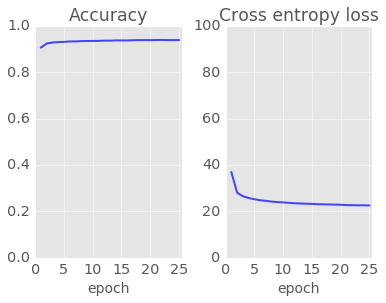

In [56]:
# data visualization
import matplotlib.pyplot as plt
%matplotlib inline  
p1 = plt.subplot(121)
p2 = plt.subplot(122)

p1.plot(epoch_set, accuracy_set, lw=2)
p1.axis([0, 25.5, 0, 1])
#plt.xlim(0, 30)
#plt.ylim(0, 1)
p1.set_xlabel('epoch', fontsize=14)
p1.grid(True)
p1.set_title('Accuracy')

p2.plot(epoch_set, loss_set, lw=2)
p2.axis([0, 25.5, 0, 100])
p2.set_xlabel('epoch', fontsize=14)
p2.set_title('Cross entropy loss')
#plt.legend(loc='upper right')

plt.show()